In [1]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1,2,2,6])

LabelEncoder()

In [2]:
le.classes_

array([1, 2, 6])

In [5]:
le.transform([1,1,2,6])

array([0, 0, 1, 2], dtype=int64)

In [27]:
zoo[0][12] = 'TRUE'
zoo[0][16] = 'FALSE'
zoo[0]

['TRUE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'TRUE',
 'TRUE',
 'TRUE',
 'TRUE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'TRUE',
 'FALSE']

In [28]:
le.inverse_transform(zoo[0])

C:\Users\gudrb\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
le.fit(["paris","paris","tokyo","amsterdam"])

LabelEncoder()

In [12]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [13]:
le.transform(["tokyo","tokyo","paris"])

array([2, 2, 1], dtype=int64)

In [41]:
import csv
with open("zoo.csv") as f:
    zoo = csv.reader(f)
    zoo = list(zoo)
zoo[0][0]='TRUE'

In [34]:
import numpy as np
zoo = np.array(zoo)
zoo.shape

(101, 17)

In [43]:
set(list(zoo[1]))

{'4', 'FALSE', 'TRUE', 'mammal'}

In [47]:
unique = []
for i in zoo:
    unique.extend(list(set(i)))
unique=list(set(unique))

In [48]:
le = preprocessing.LabelEncoder()
le.fit(unique)

LabelEncoder()

In [49]:
le.classes_

array(['0', '2', '4', '5', '6', '8', 'FALSE', 'TRUE', 'amphibian', 'bird',
       'fish', 'insect', 'invertebrate', 'mammal', 'reptile'],
      dtype='<U12')

In [55]:
print(zoo[0])
le.transform(zoo[0])


['TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', '4', 'FALSE', 'FALSE', 'TRUE', 'mammal']


array([ 7,  6,  6,  7,  6,  6,  7,  7,  7,  7,  6,  6,  2,  6,  6,  7, 13],
      dtype=int64)

In [53]:
le.transform(['mammal'])

array([13], dtype=int64)

In [58]:
le.inverse_transform(le.transform(zoo[0]))

C:\Users\gudrb\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'FALSE', 'FALSE', '4', 'FALSE', 'FALSE', 'TRUE',
       'mammal'], dtype='<U12')

In [35]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]] 
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [31]:
print(scaler.data_min_)

[-1.  2.]


In [32]:
print(scaler.transform(data)) # column 기준으로 scailing됨

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [34]:
print(scaler.transform([[-1,6]]))

[[0.   0.25]]


In [36]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[1,-1,2],[2,0,0,],[0,1,-1]])
X_scaled = preprocessing.scale(X_train) #column standardization
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


C:\Users\gudrb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler.transform(X_train))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


C:\Users\gudrb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
X,y = np.arange(10).reshape((5,2)),range(5)
print(X)
print(list(y))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
print(X_train,'\n',y_train)
print(X_test,'\n',y_test) #X,y가 셔플된 후 training, test로 나뉨

[[4 5]
 [0 1]
 [6 7]] 
 [2, 0, 3]
[[2 3]
 [8 9]] 
 [1, 4]


In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_true = [1,1,1,2,2,2]#diagonal 성분이 각 class 당 맞은 갯수
y_pred = [1,1,1,1,2,2]
print(accuracy_score(y_true,y_pred))
print(confusion_matrix(y_true,y_pred))
target_names =['class 1','class 2','class 3']
print(classification_report(y_true,y_pred,target_names = target_names))
#row(true),column(pred)기준으로 class 나눔 , precision은 pred기준 support 는 row(true) 기준

0.8333333333333334
[[3 0]
 [1 2]]
             precision    recall  f1-score   support

    class 1       0.75      1.00      0.86         3
    class 2       1.00      0.67      0.80         3

avg / total       0.88      0.83      0.83         6



C:\Users\gudrb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


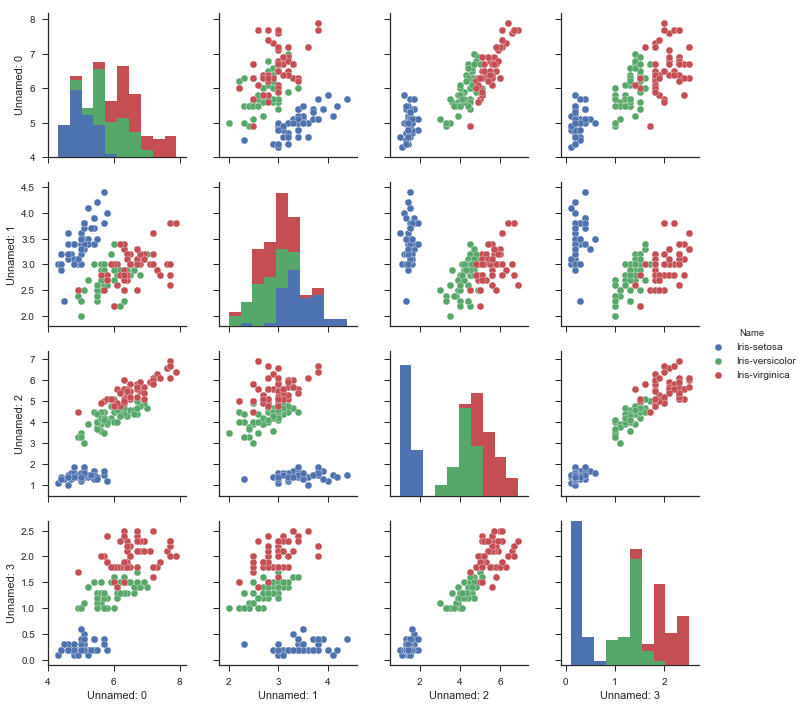

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks",color_codes=True)
z = pd.read_csv('iris.csv')
sns.pairplot(z,hue="Name") # Name : class attribute
plt.show()

In [95]:
from sklearn import tree
X,y = np.arange(10).reshape((5,2)),range(5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
print(X_train,'\n',y_train)
print(X_test,'\n',y_test)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

[[4 5]
 [0 1]
 [6 7]] 
 [2, 0, 3]
[[2 3]
 [8 9]] 
 [1, 4]


In [98]:
clf.predict([[6,7]])

array([3])

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris() # iris dataset불러오기
cv = cross_val_score(clf,iris.data,iris.target,cv = 10)
print(cv)# 정확도

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [108]:
!pip install graphviz

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [118]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

In [119]:
dot_data = tree.export_graphviz(clf,out_file=None)

In [120]:
graph = graphviz.Source(dot_data)

In [121]:
graph.render("iris")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [122]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [117]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph 

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [124]:
!pip install mlxtend

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import style
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
X,y = np.arange(10).reshape((5,2)),range(5)
print(X)
print(list(y))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
print(X_train,'\n',y_train)
print(X_test,'\n',y_test) #X,y가 셔플된 후 training, test로 나뉨

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]
[[4 5]
 [0 1]
 [6 7]] 
 [2, 0, 3]
[[2 3]
 [8 9]] 
 [1, 4]


In [148]:
style.use('seaborn-talk')
iris = datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
print(X_train,'\n',y_train)
print(X_test,'\n',y_test) #X,y가 셔플된 후 training, test로 나뉨

[[4.2 1.3]
 [6.6 2.1]
 [4.5 1.5]
 [1.4 0.2]
 [6.7 2. ]
 [4.1 1. ]
 [1.4 0.2]
 [1.3 0.3]
 [1.9 0.4]
 [3.5 1. ]
 [4.9 1.8]
 [1.9 0.2]
 [1.6 0.2]
 [1.7 0.5]
 [4.2 1.3]
 [1.5 0.2]
 [4.2 1.2]
 [6.7 2.2]
 [1.4 0.2]
 [4.3 1.3]
 [5.  2. ]
 [1.4 0.2]
 [4.8 1.8]
 [5.1 1.9]
 [4.  1. ]
 [4.5 1.5]
 [5.4 2.3]
 [4.  1.3]
 [1.7 0.4]
 [3.3 1. ]
 [5.3 1.9]
 [1.4 0.2]
 [1.2 0.2]
 [3.8 1.1]
 [5.  1.7]
 [1.5 0.1]
 [5.1 2.4]
 [1.5 0.2]
 [1.6 0.6]
 [4.8 1.8]
 [3.  1.1]
 [5.7 2.3]
 [5.1 1.6]
 [5.6 1.4]
 [6.1 2.3]
 [4.  1.3]
 [1.4 0.2]
 [1.1 0.1]
 [5.  1.5]
 [6.  1.8]
 [1.5 0.2]
 [1.4 0.3]
 [1.3 0.2]
 [4.9 1.5]
 [5.6 2.4]
 [1.4 0.3]
 [5.5 2.1]
 [6.  2.5]
 [1.3 0.2]
 [4.7 1.4]
 [4.6 1.5]
 [4.8 1.8]
 [4.7 1.4]
 [5.3 2.3]
 [1.6 0.2]
 [5.4 2.1]
 [4.2 1.5]
 [5.2 2. ]
 [3.5 1. ]
 [3.9 1.4]
 [4.6 1.4]
 [1.3 0.3]
 [4.6 1.3]
 [4.4 1.2]
 [1.5 0.2]
 [4.1 1.3]
 [6.3 1.8]
 [5.7 2.1]
 [1.5 0.4]
 [3.3 1. ]
 [5.7 2.5]
 [5.8 1.6]
 [1.5 0.1]
 [5.6 2.4]
 [1.4 0.2]
 [4.9 1.5]
 [6.1 1.9]
 [5.6 1.8]
 [4.1 1.3]
 [5.5 1.8]
 [4.4 1.3]

In [152]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [153]:
print(len(y_train))
print(len(y_test))

100
50


In [154]:
print(len(X_train))
print(len(X_test))

100
50


In [155]:
ml = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
ml.fit(X_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [169]:
X_test_std[:]

array([[ 0.51155872, -0.02416432],
       [-1.22646639, -1.2323802 ],
       [ 1.78611047,  1.45254398],
       [ 0.39569038,  0.37857431],
       [ 0.56949289,  0.2443281 ],
       [-1.34233473, -1.09813399],
       [-0.12571715,  0.11008189],
       [ 0.7432954 ,  1.45254398],
       [ 0.39569038,  0.37857431],
       [ 0.04808536, -0.02416432],
       [ 0.7432954 ,  1.04980535],
       [-1.4002689 , -1.50087261],
       [-1.45820307, -1.36662641],
       [-1.34233473, -1.50087261],
       [-1.34233473, -1.2323802 ],
       [ 0.51155872,  0.51282052],
       [ 1.1488346 ,  1.31829777],
       [ 0.04808536, -0.15841053],
       [ 0.39569038,  0.11008189],
       [ 1.03296626,  1.31829777],
       [-1.28440056, -1.36662641],
       [ 0.62742706,  0.78131293],
       [-1.28440056, -1.09813399],
       [ 1.03296626,  1.18405156],
       [ 1.49643962,  1.04980535],
       [ 0.80122958,  1.45254398],
       [ 1.1488346 ,  0.78131293],
       [ 1.20676877,  1.45254398],
       [-1.4002689 ,

In [171]:
print(len(X_test_std[1]))
print(len(X_test_std[:]))

2
50


In [172]:
y_pred = ml.predict(X_test_std)
(y_test!=y_pred)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [160]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [161]:
y_pred

[1, 1, 1, 1, 2, 2]

In [173]:
print('the number of tests: %d, the number of errors:%d'%(len(y_test), (y_test!=y_pred).sum() ))
print('accuracy: %.2f'%accuracy_score(y_test,y_pred))

the number of tests: 50, the number of errors:1
accuracy: 0.98


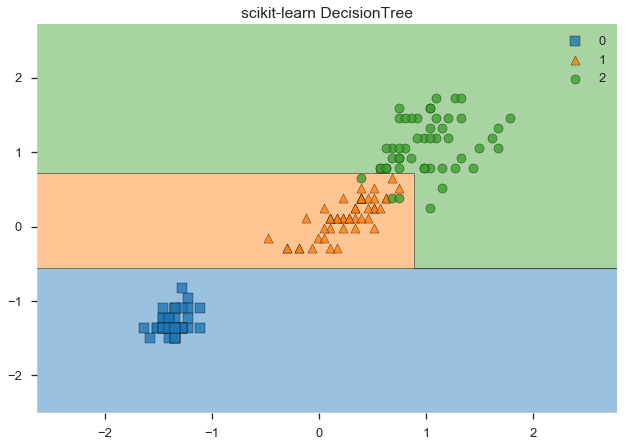

In [175]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined_std,clf=ml)
plt.title('scikit-learn DecisionTree')
plt.show()

In [177]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.94      1.00      0.97        15
          2       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        50



C:\Users\gudrb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [179]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data,iris.target),(digits.data,digits.target),datasets.make_circles(noise=0.2,factor=0.5,random_state=1),datasets.make_moons(noise=0.3,random_state=0)]
for ax,data,name in zip(axes.rave(),data_sets,['iris','digits','circles','moons']):
    plot_on_dataset(*data,ax=ax,name=name)
flg.legend(ax.get_lines(),labels,ncol=3,loc="upper center")
plt.show()

NameError: name 'axes' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
h = .02
names = ["DecisionTree","Neural Net"]
classifiers=[DecisionTreeClassifier(max_depth=5),MLPClassifier(alpha=1)]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable
figure = plt.figure(figsize=(27, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1
for name, clf in zip(names, classifiers):
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
